In [1]:
import numpy as np
#from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import sys
import csv

matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern']})
matplotlib.rc('text', usetex=True)

#plt.rcParams["font.family"] = "serif"
plt.rc('axes', linewidth=1.25)
plt.rc('xtick.major', size=5, width=1.25)
plt.rc('xtick.minor', size=5, width=1.25)
plt.rc('ytick.major', size=5, width=1.25)
plt.rc('ytick.minor', size=5, width=1.25)
ticklabelsize=11
legendlabelsize=11
axislabelsize=20

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
bigclstzeroef=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/completed.dat")

In [3]:
bigclstef05V_nm=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/0.5-V_nm.dat")

In [4]:
bigclstef03V_nm=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/0.3-V_nm.dat")

In [5]:
bigclstef07V_nm=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/0.7-V_nm.dat")

In [6]:
bigclstef08V_nm=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/0.8-V_nm.dat")

In [53]:
bigclstef05V_nm

array([[0.0000e+00, 9.0000e+01],
       [1.0000e+00, 9.1000e+01],
       [2.0000e+00, 6.7000e+01],
       ...,
       [9.9998e+04, 8.5000e+01],
       [9.9999e+04, 7.5000e+01],
       [1.0000e+05, 1.3100e+02]])

In [54]:
t,N=bigclstzeroef.T

(array([1.8423e+04, 4.4825e+04, 2.2591e+04, 8.8740e+03, 3.5340e+03,
        1.2890e+03, 3.4600e+02, 9.7000e+01, 1.9000e+01, 3.0000e+00]),
 array([ 19. ,  48.2,  77.4, 106.6, 135.8, 165. , 194.2, 223.4, 252.6,
        281.8, 311. ]),
 <BarContainer object of 10 artists>)

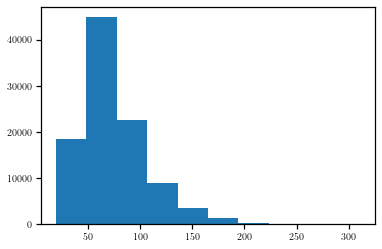

In [55]:
counts, bins = np.histogram(N)
plt.hist(bins[:-1], bins, weights=counts)

In [56]:
bins

array([ 19. ,  48.2,  77.4, 106.6, 135.8, 165. , 194.2, 223.4, 252.6,
       281.8, 311. ])

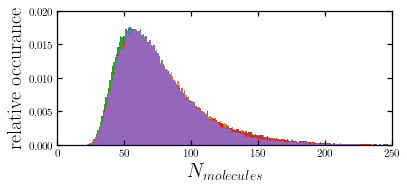

In [7]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
#ax[1]=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,250,0,0.02)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.4/ax.get_data_ratio())

counts03V_nm, bins03V_nm = np.histogram(bigclstef03V_nm[:,1],bins=np.arange(500))
counts05V_nm, bins05V_nm = np.histogram(bigclstef05V_nm[:,1],bins=np.arange(500))
counts07V_nm, bins07V_nm = np.histogram(bigclstef07V_nm[:,1],bins=np.arange(500))
counts08V_nm, bins08V_nm = np.histogram(bigclstef08V_nm[:,1],bins=np.arange(500))
countszeroef, binszeroef = np.histogram(bigclstzeroef[:,1],bins=np.arange(500))

#ax.hist(bins[:-1], bins, weights=counts,bins=100)
n1, bins1, patches1 = ax.hist(bins03V_nm[:-1], bins=500, weights=counts03V_nm/100000)
n2, bins2, patches2 = ax.hist(bins05V_nm[:-1], bins=500, weights=counts05V_nm/100000)
n3, bins3, patches3 = ax.hist(binszeroef[:-1], bins=500, weights=countszeroef/100000)
n4, bins4, patches4 = ax.hist(bins07V_nm[:-1], bins=500, weights=counts07V_nm/100000)
n5, bins5, patches5 = ax.hist(bins08V_nm[:-1], bins=500, weights=counts08V_nm/100000)


#plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)


#plt.axvline(x=10.169, color=tableau20[0])

plt.ylabel(r'relative occurance', fontsize=axislabelsize) # Y label
plt.xlabel(r'$N_{molecules}$',fontsize=axislabelsize)
#plt.savefig("bigcluster_ef-6_hbonds.pdf",bbox_inches='tight')

plt.show()

In [31]:
np.sum(bigclstzeroef[:,1]/100000)

74.79133999999999

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


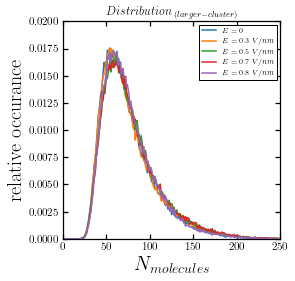

In [8]:
fig, ax = plt.subplots(1,1, sharex='col', sharey='row')

ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,250,0,0.02)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())


bins_mean3 = [0.5 * (bins3[i] + bins3[i+1]) for i in range(len(n3))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean3, n3, label=r'$E=0$')

bins_mean1 = [0.5 * (bins1[i] + bins1[i+1]) for i in range(len(n1))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean1, n1,label=r'$E=0.3\;V/nm$')

bins_mean2 = [0.5 * (bins2[i] + bins2[i+1]) for i in range(len(n2))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean2, n2, label=r'$E=0.5\;V/nm$')

bins_mean4 = [0.5 * (bins4[i] + bins4[i+1]) for i in range(len(n4))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean4, n4, label=r'$E=0.7\;V/nm$')

bins_mean5 = [0.5 * (bins5[i] + bins5[i+1]) for i in range(len(n5))]
#ax = fig.add_subplot(122)
ax.plot(bins_mean5, n5, label=r'$E=0.8\;V/nm$')



#plt.legend(loc='upper right',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=1.0*legendlabelsize)

plt.title(r'$Distribution_{\;(larger-cluster)}$')
plt.ylabel(r'relative occurance', fontsize=axislabelsize) # Y label
plt.xlabel(r'$N_{molecules}$',fontsize=axislabelsize)
ax.legend(loc='upper right',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.65*legendlabelsize)

plt.savefig("cluster_distribution_of_biggest_clst.png",bbox_inches='tight',dpi=600)

plt.show()

In [5]:
/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots/cluster_distribution_of_biggest_clst.pdf

'/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots'

In [10]:
pwd

'/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/hbonds/hbonds_100ns_plots'